In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA


In [2]:
# load data
df = pd.read_csv('Coimbra_breast_cancer_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [3]:
# here we change the classification encoding, since it´s common to use 1 for positive class and 0 for negative class
df['Classification'] = df['Classification'] -1

<Figure size 1000x1000 with 0 Axes>

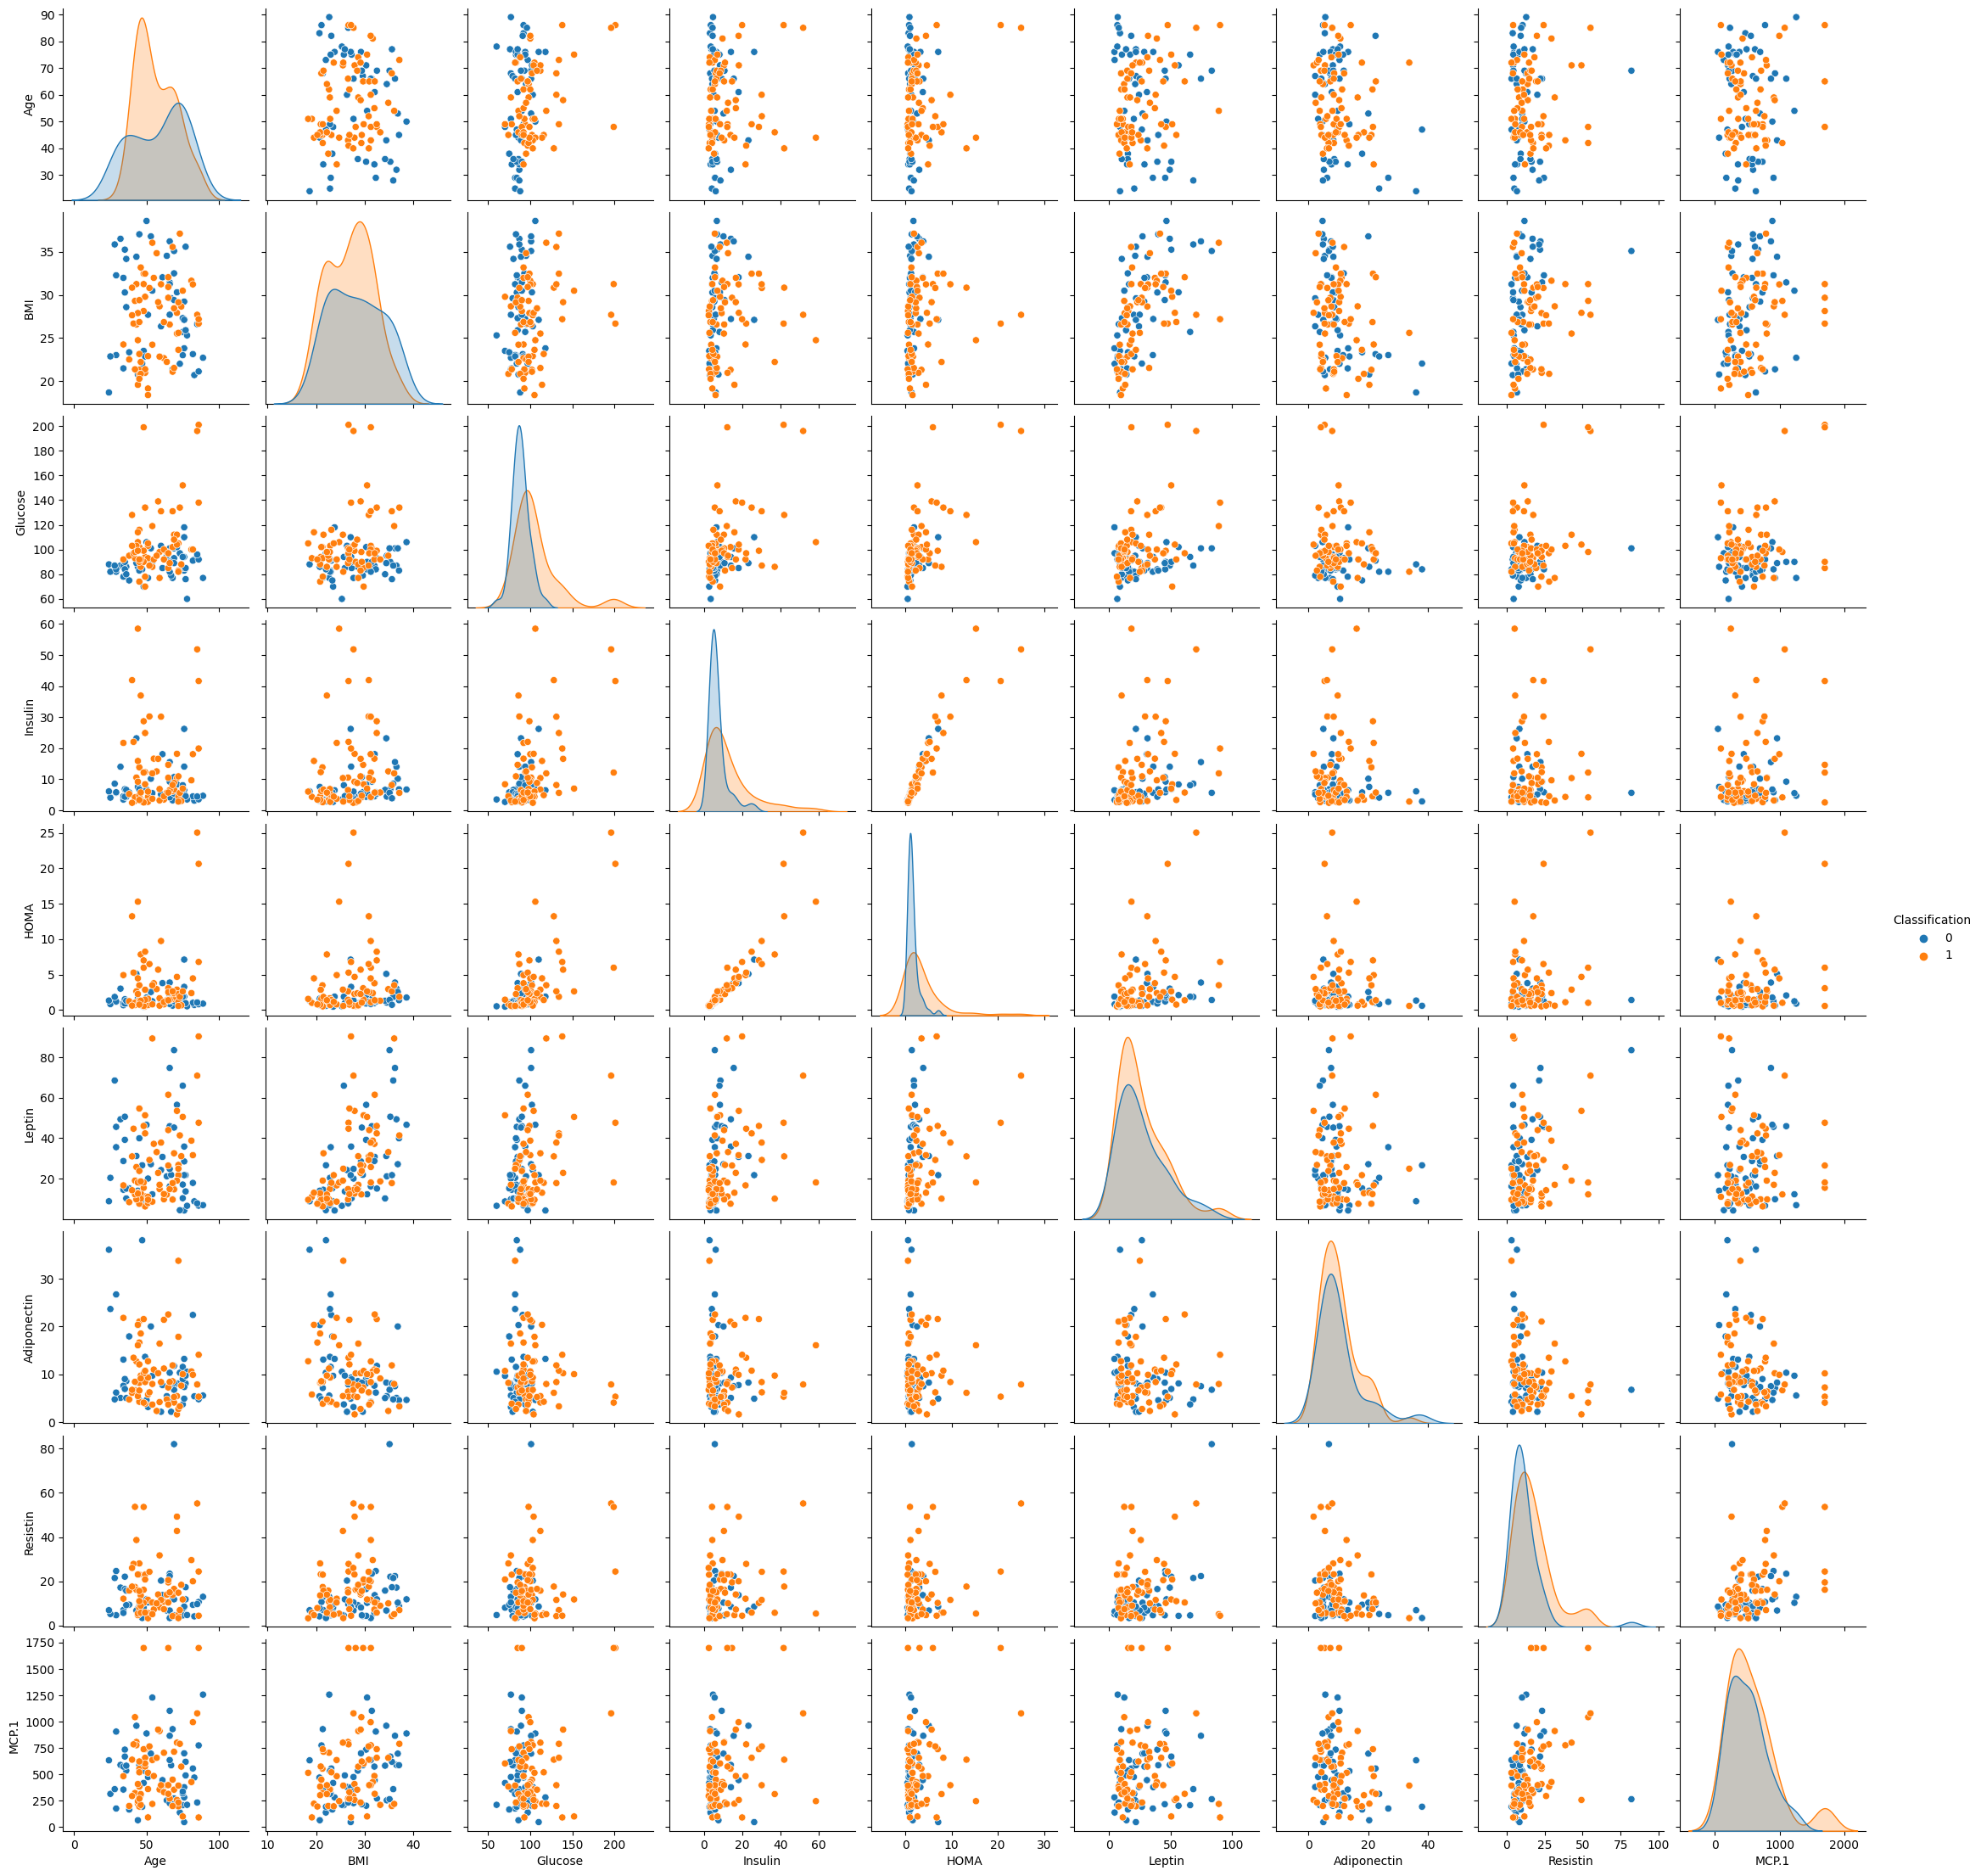

In [4]:
# plotting a pairplot in order to view possible correlations and variables distributions
fig = plt.figure(figsize=(10,10))
sns.pairplot(data=df, hue='Classification')
plt.show()

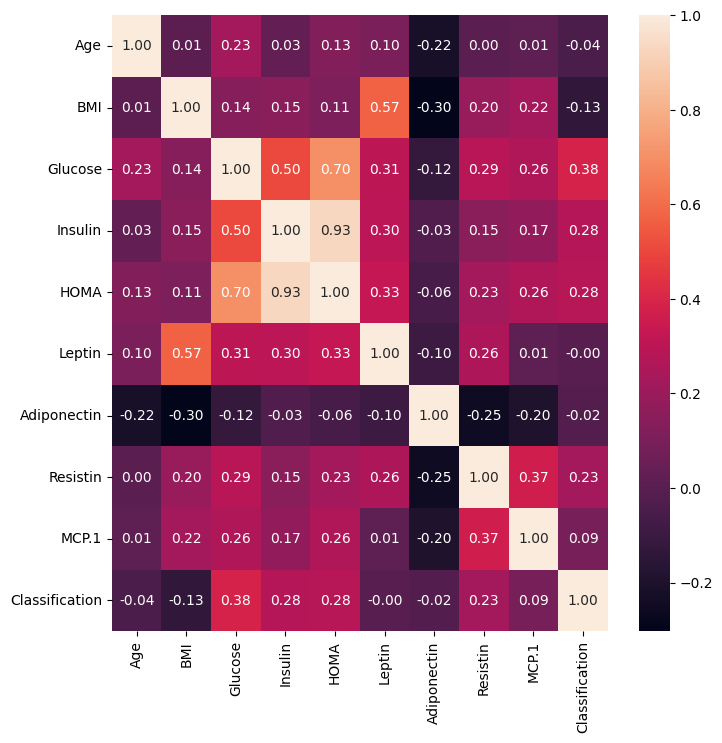

In [5]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f")
plt.show()

In [6]:
# splitting the data into train and test sets
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=639)
# let's see how different models would perform
models, predictions = LazyClassifier().fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:00<00:00, 37.21it/s]

[LightGBM] [Info] Number of positive: 49, number of negative: 43
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532609 -> initscore=0.130620
[LightGBM] [Info] Start training from score 0.130620
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifierCV,0.79,0.81,0.81,0.79,0.00
RidgeClassifier,0.79,0.81,0.81,0.79,0.02
PassiveAggressiveClassifier,0.79,0.81,0.81,0.79,0.00
AdaBoostClassifier,0.79,0.79,0.79,0.79,0.10
ExtraTreesClassifier,0.79,0.77,0.77,0.79,0.05
LinearDiscriminantAnalysis,0.75,0.76,0.76,0.75,0.02
SGDClassifier,0.75,0.76,0.76,0.75,0.02
KNeighborsClassifier,0.75,0.76,0.76,0.75,0.02
SVC,0.75,0.73,0.73,0.75,0.00


In [13]:
# Let's start with RidgeCV
ridgeCV_model = RidgeClassifierCV()
param_grid_ridge = {
                    'alphas': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
                    'scoring': ['accuracy'],
                    'cv': [None, 10],
                    'class_weight': [None, 'balanced']
                    }
grid_search = GridSearchCV(ridgeCV_model, param_grid_ridge, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')
best_ridge_model = grid_search.best_estimator_
best_accuracy_ridge = best_ridge_model.score(X_test, y_test)
print(f'Accuracy on the test set: {best_accuracy_ridge:.4f}')


Best params: {'alphas': 1, 'class_weight': 'balanced', 'cv': None, 'scoring': 'accuracy'}
Accuracy on the test set: 0.7917


In [14]:
n_comp = []
acc = []
for i in range(1,10):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    ridge_temp = RidgeClassifierCV()
    ridge_temp.fit(X_train_pca, y_train)
    y_pred_ridge_temp = ridge_temp.predict(X_test_pca)
    accuracy_ridge_temp = accuracy_score(y_test, y_pred_ridge_temp)
    n_comp.append(i)
    acc.append(accuracy_ridge_temp)
    print(f'XGB Accuracy: {accuracy_ridge_temp:.4f}, Number of components: {i}')

XGB Accuracy: 0.5000, Number of components: 1
XGB Accuracy: 0.5833, Number of components: 2
XGB Accuracy: 0.7500, Number of components: 3
XGB Accuracy: 0.5833, Number of components: 4
XGB Accuracy: 0.6250, Number of components: 5
XGB Accuracy: 0.7917, Number of components: 6
XGB Accuracy: 0.7917, Number of components: 7
XGB Accuracy: 0.7917, Number of components: 8
XGB Accuracy: 0.7917, Number of components: 9


In [15]:
acc_dict = {}
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

ridgeCV_model = RidgeClassifierCV()
param_grid_ridge = {
                    'alphas': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
                    'scoring': ['accuracy'],
                    'cv': [None, 10],
                    'class_weight': [None, 'balanced']
                    }
grid_search = GridSearchCV(ridgeCV_model, param_grid_ridge, cv=10, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)
print(f'Best params: {grid_search.best_params_}')
best_ridge_model = grid_search.best_estimator_
best_accuracy_ridge = best_ridge_model.score(X_test_pca, y_test)
print(f'Accuracy on the test set: {best_accuracy_ridge:.4f}')

Best params: {'alphas': 1e-05, 'class_weight': 'balanced', 'cv': None, 'scoring': 'accuracy'}
Accuracy on the test set: 0.7083


In [3]:
L = [0, 1, 2]
list(map(lambda x: x**2, L))

[0, 1, 4]

In [4]:
tupla = (1, 2, [1,2])
tupla[-1].append(1)

In [5]:
tupla

(1, 2, [1, 2, 1])